In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal as sig
import scipy 
from scipy import constants as con

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [58]:
altcrystal1_a4_Apm = np.genfromtxt((conv(x) for x in open("A4 Festkörper/altcrystal1_a4_Apm.csv")), delimiter =";")
salt_pvdf_trfe_a4_apm = np.genfromtxt((conv(x) for x in open("A4 Festkörper/salt+pvdf-trfe_a4_apm.CSV")), delimiter =";")
methan_A05_2ndtry = np.genfromtxt((conv(x) for x in open("A4 Festkörper/methan_A0.5_2ndtry.CSV")), delimiter =";")
methan1_std_A4 = np.genfromtxt((conv(x) for x in open("A4 Festkörper/methan1_std_A4.CSV")), delimiter =";")

Text(0.5, 1.0, 'Spektrum Methan')

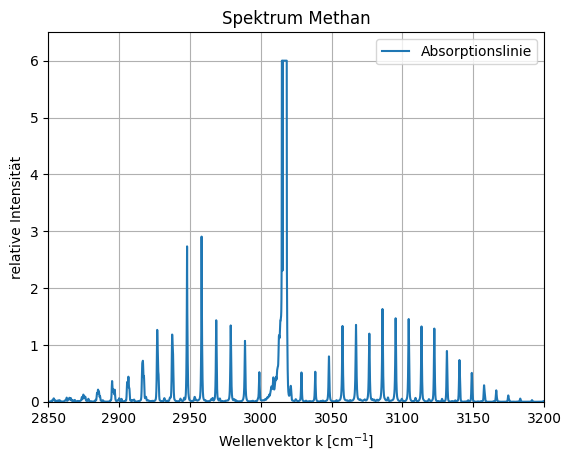

In [59]:
plt.plot(methan_A05_2ndtry [:,0],(methan_A05_2ndtry[:,1]) ,label= r"Absorptionslinie")
plt.axis([2850,3200,0,6.5])
plt.xlabel(r"Wellenvektor k $[\mathrm{cm}^{-1}]$")
plt.ylabel("relative Intensität")
plt.legend(loc = 0)
plt.grid(True)
plt.savefig("newplots/methanspectrum-peaks.pdf")
plt.title("Spektrum Methan")

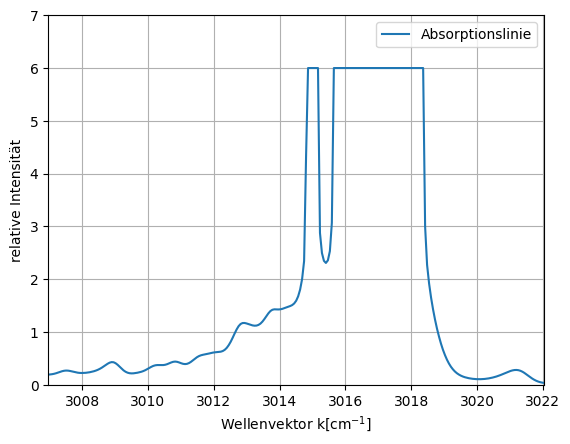

(37400.0, 37650.0, 0.0, 7.0)

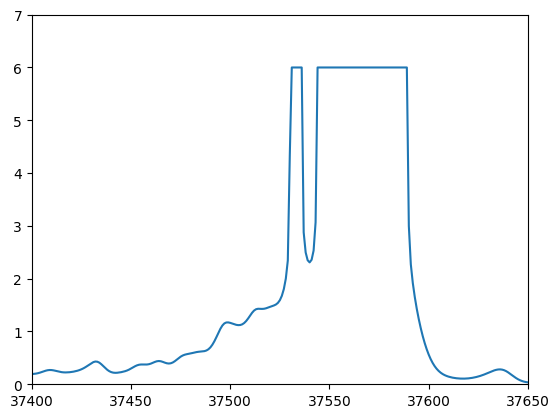

In [60]:
#plt.figure(figsize = [15,10])
#plt.plot(methan1_std_A4 [:,0],(methan1_std_A4 [:,1]) ,label= r"Absorptionslinie")

a = 37400
b= 37650

plt.plot(methan_A05_2ndtry [:,0],(methan_A05_2ndtry[:,1]) ,label= r"Absorptionslinie")
plt.axis([methan_A05_2ndtry[a,0],methan_A05_2ndtry[b,0],0,7])
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("relative Intensität")
plt.legend(loc = 0)
plt.grid(True)
plt.savefig("newplots/midpeak.pdf")
plt.show()

plt.plot((np.arange(0,len(methan_A05_2ndtry))),(methan_A05_2ndtry[:,1]),label="index")
plt.axis([a,b,0,7])

In [66]:
def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))

outerpeaks = []
peakerror = []

def peakstuff(mean,sigma,array1,d1,d2,a=1):
    x1a = np.asarray(array1[d1:d2,0])
    y1a = np.asarray(array1[d1:d2,1])
    
    #fit gaussian
    popt1,pcov1 = curve_fit(gaus,x1a,y1a,p0=[a,mean,sigma])

    print(popt1[1],popt1[2])
    peakerror.append(popt1[2])
    outerpeaks.append(popt1[1])
    
    
#     plt.plot(x1a, gaus(x1a,*popt1), label='Gauß-Fit-Anfang 1')
#     plt.scatter(array1[:,0],array1[:,1],c="lightblue",s=2)
#     plt.xlabel(r"Wellenvektor k $[\mathrm{cm^{-1}}]$")
#     plt.ylabel("relative Intensität")
#     plt.xlim(array1[d1,0]-5,array1[d2,0]+5)
#     plt.show()

In [67]:
peakstuff(3008,2,methan_A05_2ndtry,37425,37440)
peakstuff(3021,2,methan_A05_2ndtry,37622,37648)

3008.8840201189073 0.41926551115098104
3021.091854067825 -0.48550472362749164


In [68]:
truemid2 = (3021.091854067825 + 3008.8840201189073)/2
print(truemid2, truemid2 - 3008.8840201189073)

3014.987937093366 6.103916974458571


In [94]:
mh = 1.673*10**(-27) 
mc = 1.99*10**(-26) 
#mu  = (mh*4*mc)/(mh*4+mc)
mu = 1.548*10**(-27)
kraftcon = (2 * np.pi *con.c * truemid2*100)**2*mu
ukraftcon = np.sqrt(((truemid2-3008.8840201189073)*100)*(16*con.pi**2*con.c**2*mu*truemid2*100)**2)
print(kraftcon,ukraftcon)

499.2789504976392 0.16365224899123837


In [70]:
outerpeaks = []
peakerror = []

peakstuff(2948,3,methan_A05_2ndtry,36412,36433)
peakstuff(2960,3,methan_A05_2ndtry,36580,36605)
peakstuff(2969,3,methan_A05_2ndtry,36755,36773)
peakstuff(2978,3,methan_A05_2ndtry,36920,36948)
peakstuff(3048,5,methan_A05_2ndtry,38075,38095)
peakstuff(3057,3,methan_A05_2ndtry,38235,38250)
peakstuff(3066,3,methan_A05_2ndtry,38390,38410)
peakstuff(3075,3,methan_A05_2ndtry,38547,38565)
peakstuff(3084,3,methan_A05_2ndtry,38701,38720)
#print(outerpeaks,peakerror)

midval = np.mean(outerpeaks[0:8])

allerr = 0
for i in range(0,8):
    allerr += (1/8*peakerror[i])**2
miderr = np.sqrt(allerr)

print(midval,miderr)

2948.029882623305 -0.28024714476523044
2958.3078072083526 0.2791805892741246
2968.610539473411 0.28305712049690995
2978.842417753153 0.31886922722317523
3048.155796104202 -0.29683888652048684
3057.7074763710607 -0.28806035422298654
3067.2287813651687 0.32562590948015374
3076.6224672941735 0.3128485953890024
3085.931914926884 0.31247052374110956
3012.9381460241034 0.10556971555400774


In [89]:
d= np.concatenate((np.diff(outerpeaks[0:4]),np.diff(outerpeaks[4:9])))

Berr = 0
for i in range(len(peakerror)):
    Berr += (peakerror[i]*1/14)**2
Berrges = np.sqrt(Berr)

for i in range(len(outerpeaks)):
    print(str(np.round(outerpeaks[i],2))+r"&"+str(np.round(peakerror[i],2))+r"\\")

B = (sum(d)/len(d))/2

R = np.sqrt((con.hbar**2)/(con.h*con.c*16/3*mh*B*100))
Rerr = np.sqrt((Berr*(-(np.sqrt(3)*np.abs(con.hbar))/(8*con.c*con.h*mh*(B*100)**2*np.sqrt((1)/(con.c*con.h*mh*B*100)))))**2)

I = 8/3*mh*R**2
Ierr = np.sqrt((Rerr*(16/3*mh*R))**2)

print("Roationskonstante B= "+str(np.round(B,5))+" \pm "+str(np.round(Berrges,3)))
print("Bindungsabstand R= "+str(np.round(R,18))+" \pm "+str(np.round(Rerr,18)))
print("Trägheitsmoment I= "+str(np.round(I,54))+" \pm "+str(np.round(Ierr,54)))

2948.03&-0.28\\
2958.31&0.28\\
2968.61&0.28\\
2978.84&0.32\\
3048.16&-0.3\\
3057.71&-0.29\\
3067.23&0.33\\
3076.62&0.31\\
3085.93&0.31\\
Roationskonstante B= 4.89919 \pm 0.064
Bindungsabstand R= 1.13169224e-10 \pm 4.78e-16
Trägheitsmoment I= 5.7137515e-47 \pm 4.8299999999999996e-52


In [51]:
testk = (2*(con.h*con.c*Berr*1/100))/(R**2)
print(testk)

1.2834224255752337e-11
